#### importing necessary libraries

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

loading data of Netflix contents

In [22]:
df = pd.read_csv("./Netflix_titles.csv",index_col = "show_id")
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [23]:
print(df.shape)
df.columns

(6234, 11)


Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6234 entries, 81145628 to 70153404
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          6234 non-null   object
 1   title         6234 non-null   object
 2   director      4265 non-null   object
 3   cast          5664 non-null   object
 4   country       5758 non-null   object
 5   date_added    6223 non-null   object
 6   release_year  6234 non-null   int64 
 7   rating        6224 non-null   object
 8   duration      6234 non-null   object
 9   listed_in     6234 non-null   object
 10  description   6234 non-null   object
dtypes: int64(1), object(10)
memory usage: 584.4+ KB


##### Growth of contents over years

Text(0.5, 1.0, 'Contents per year')

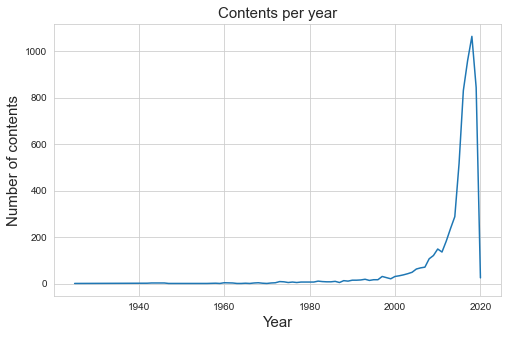

In [26]:
group = df["release_year"].value_counts()
plt.figure(figsize = (8,5))
sns.lineplot(group.index,group)

plt.xlabel("Year", fontsize = 15)
plt.ylabel("Number of contents", fontsize = 15)
plt.title("Contents per year",fontsize = 15)

In [5]:
print(df.type.unique())
df_movies = df.loc[df.type == "Movie"]
df_shows = df.loc[df.type == "TV Show"]

['Movie' 'TV Show']


##### Growth in number of movies and number of TV Shows over years

Text(0.5, 1.0, 'Contents per year')

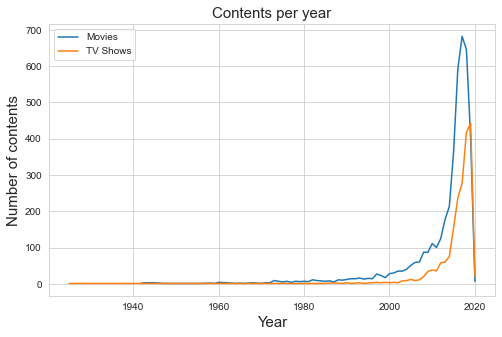

In [6]:
plt.figure(figsize = (8,5))
sns.lineplot(df_movies["release_year"].value_counts().index,df_movies["release_year"].value_counts(), label = "Movies")
sns.lineplot(df_shows["release_year"].value_counts().index,df_shows["release_year"].value_counts(), label = "TV Shows")
plt.legend(loc = "best")
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Number of contents", fontsize = 15)
plt.title("Contents per year",fontsize = 15)

from the graph it is clear that number of TV Shows starts to increase after the increase in the movies. Both Movies and TV Shows have to face halt due to coronavirus and number felt near to zero in 2020 

##### Number of Netflix Shows per country

In [7]:
df["country"].value_counts().nlargest(15)

United States     2032
India              777
United Kingdom     348
Japan              176
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Australia           71
Taiwan              69
Hong Kong           51
Egypt               50
China               50
Name: country, dtype: int64

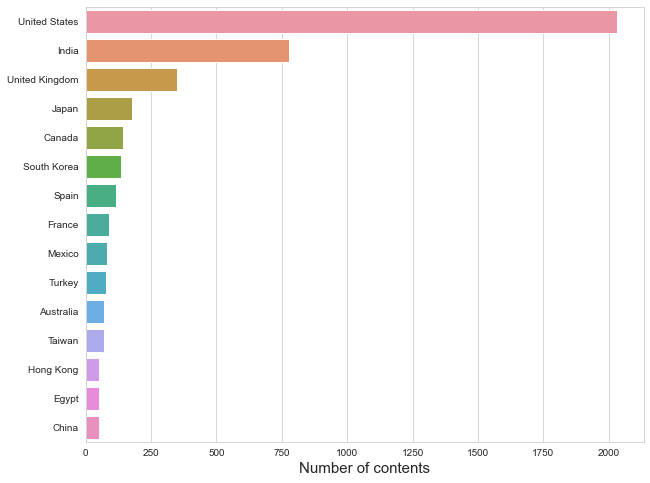

In [8]:
plt.figure(figsize = (10,8))
sns.barplot(df["country"].value_counts().nlargest(15),df["country"].value_counts().nlargest(15).index)
plt.xlabel("Number of contents", fontsize = 15)
plt.show()

USA is the bigger producer of content while India comes at second in making TV Shows and Movies.

In [29]:
#to select the first value of columns having multivalues
def listed_in(listed):
    return listed.split(',')[0]

##### TV Shows and Movies per category

In [34]:
df_movies["listed_in2"] = df_movies["listed_in"].apply(lambda x: f"{listed_in(x)}")
df_movies["listed_in2"].nunique()

18

In [35]:
df_movies["listed_in2"].value_counts().nlargest(15)

Dramas                      1077
Comedies                     803
Documentaries                644
Action & Adventure           597
Children & Family Movies     358
Stand-Up Comedy              273
Horror Movies                205
International Movies          85
Classic Movies                62
Movies                        56
Thrillers                     40
Independent Movies            18
Anime Features                12
Music & Musicals              12
Sci-Fi & Fantasy              10
Name: listed_in2, dtype: int64

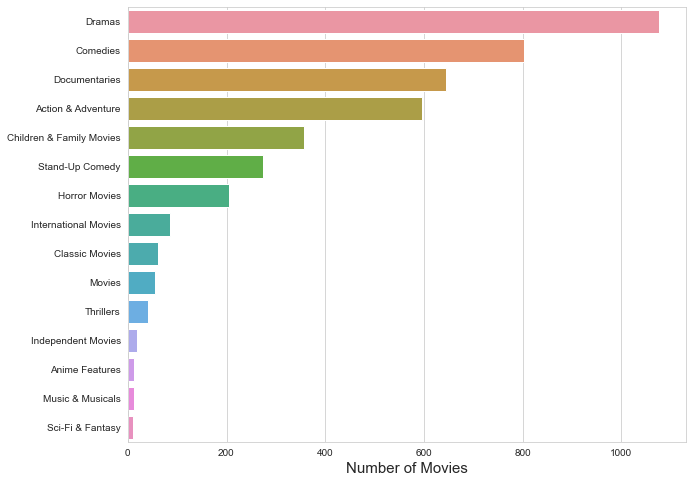

In [41]:
plt.figure(figsize = (10,8))
sns.barplot(df_movies["listed_in2"].value_counts().nlargest(15),df_movies["listed_in2"].value_counts().nlargest(15).index)
plt.xlabel("Number of Movies", fontsize = 15)
plt.show()

Dramas and Comedies are two largest catrgories in which movies are listed

In [37]:
df_shows["listed_in2"] = df_shows["listed_in"].apply(lambda x: f"{listed_in(x)}")
df_shows["listed_in2"].nunique()

17

In [42]:
df_shows["listed_in2"].value_counts().nlargest(15)

International TV Shows          570
Crime TV Shows                  309
Kids' TV                        288
British TV Shows                210
Docuseries                      148
Anime Series                    117
TV Comedies                      89
Reality TV                       63
TV Dramas                        56
TV Action & Adventure            30
Stand-Up Comedy & Talk Shows     28
Romantic TV Shows                21
Classic & Cult TV                19
TV Shows                         10
TV Horror                         9
Name: listed_in2, dtype: int64

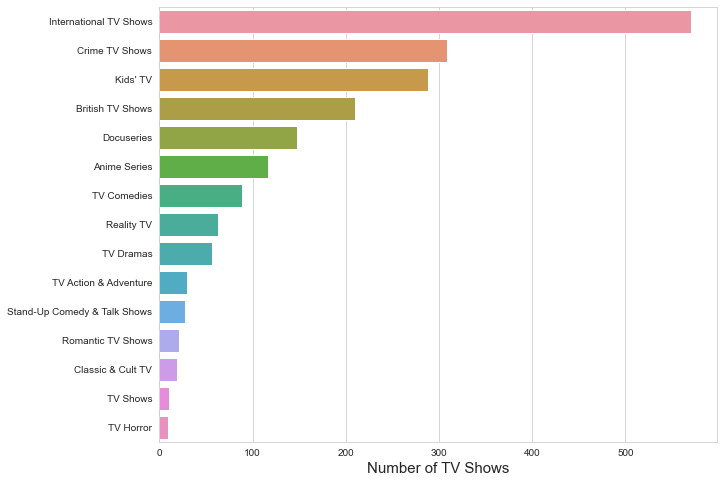

In [43]:
plt.figure(figsize = (10,8))
sns.barplot(df_shows["listed_in2"].value_counts().nlargest(15),df_shows["listed_in2"].value_counts().nlargest(15).index)
plt.xlabel("Number of TV Shows", fontsize = 15)
plt.show()

International TV shows, Crime TV shows and kids' TV are the categories in which most number of TV Shows are listed

In [12]:
nan_df = df[df.isna().any(axis=1)]
display(nan_df.head())

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,listed_in2
show_id,,,,,,,,,,,,
80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,Stand-Up Comedy
70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",Kids' TV
80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,Kids' TV
80163890,TV Show,Apaches,NaN,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...,Crime TV Shows
80117902,TV Show,Fire Chasers,NaN,NaN,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ...",Docuseries


##### Dropping NaN values from director column and selecting the first listed director in the column

In [44]:
all_data = df.dropna(subset = ['director'])
all_data_movies.head()
print(all_data_movies.shape)

(4137, 12)


In [48]:
all_data["Director"] = all_data["director"].apply(lambda x: f'{listed_in(x)}')
all_data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,listed_in2,Director
show_id,,,,,,,,,,,,,
81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,Children & Family Movies,Richard Finn
80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,Comedies,Fernando Lebrija
70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f...",International Movies,Gabe Ibáñez
80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,Stand-Up Comedy,Rodrigo Toro
70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...,Action & Adventure,Henrik Ruben Genz


In [53]:
all_data_movies = all_data.loc[all_data["type"] == "Movie"]
all_data_movies.Director.nunique()

3115

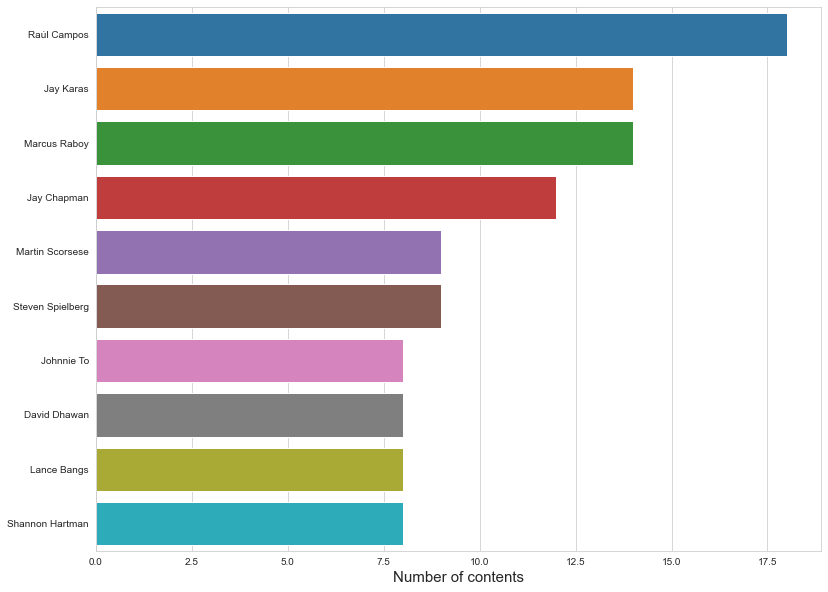

In [58]:
plt.figure(figsize = (13,10))
sns.barplot(all_data_movies["Director"].value_counts().nlargest(10),all_data_movies["Director"].value_counts()\
            .nlargest(10).index)
plt.xlabel("Number of contents", fontsize = 15)
plt.show()

##### Raul Campos has directed largest number of Movies

In [55]:
all_data_shows = all_data.loc[all_data["type"] == "TV Show"]
all_data_shows.Director.nunique()

119

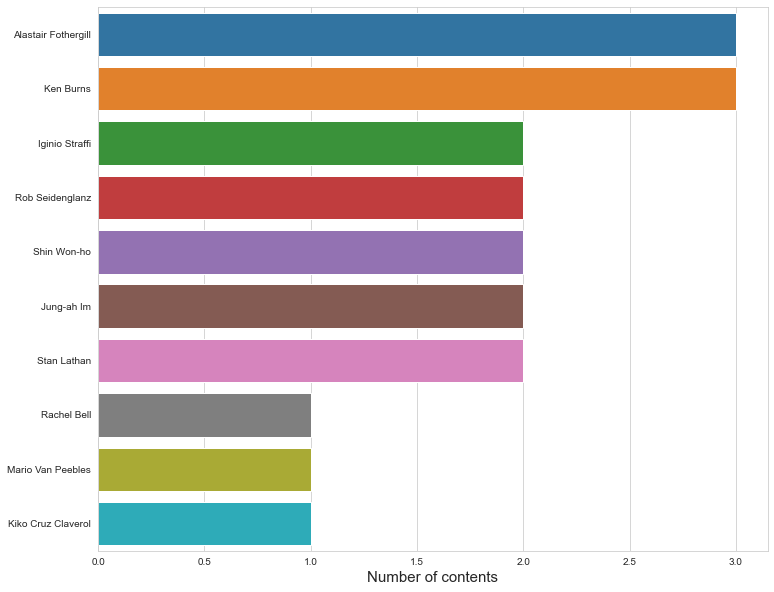

In [59]:
plt.figure(figsize = (12,10))
sns.barplot(all_data_shows["Director"].value_counts().nlargest(10),all_data_shows["Director"].value_counts()\
            .nlargest(10).index)
plt.xlabel("Number of contents", fontsize = 15)
plt.show()

##### Alastair Fothergill and ken Burns are biggest directors of TV Shows

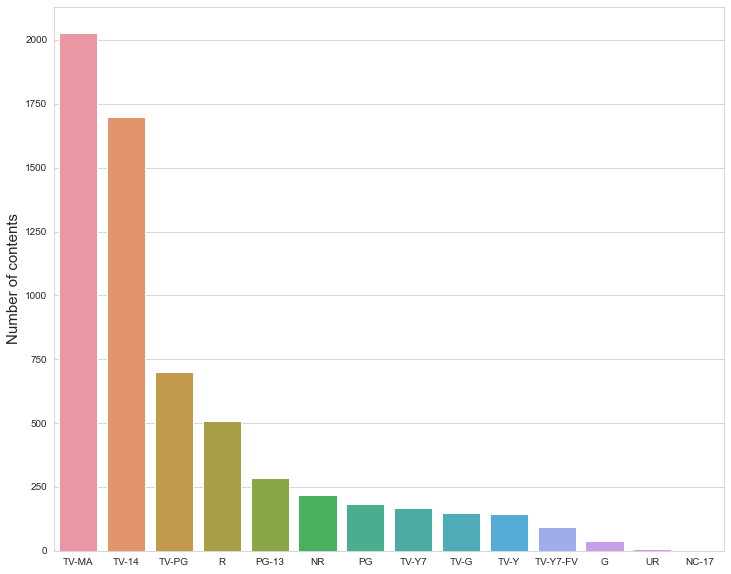

In [17]:
plt.figure(figsize = (12,10))
sns.barplot(df["rating"].value_counts().index,df["rating"].value_counts())
plt.ylabel("Number of contents", fontsize = 15)
plt.show()

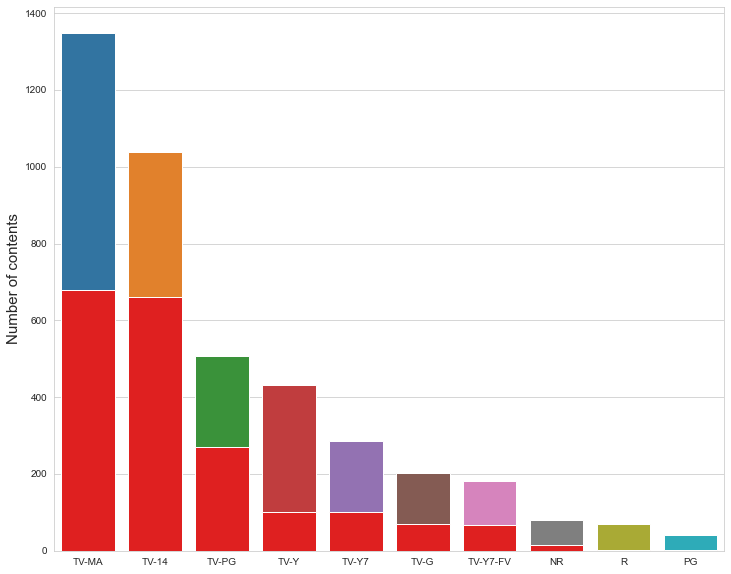

In [18]:
plt.figure(figsize = (12,10))
sns.barplot(df_movies["rating"].value_counts().nlargest(10).index,df_movies["rating"].value_counts().nlargest(10))
sns.barplot(df_shows["rating"].value_counts().nlargest(10).index,df_shows["rating"].value_counts().nlargest(10),color = 'r')
plt.ylabel("Number of contents", fontsize = 15)
plt.show()

##### Most number of TV shows and Movies have TV-MA and TV-14 ratings

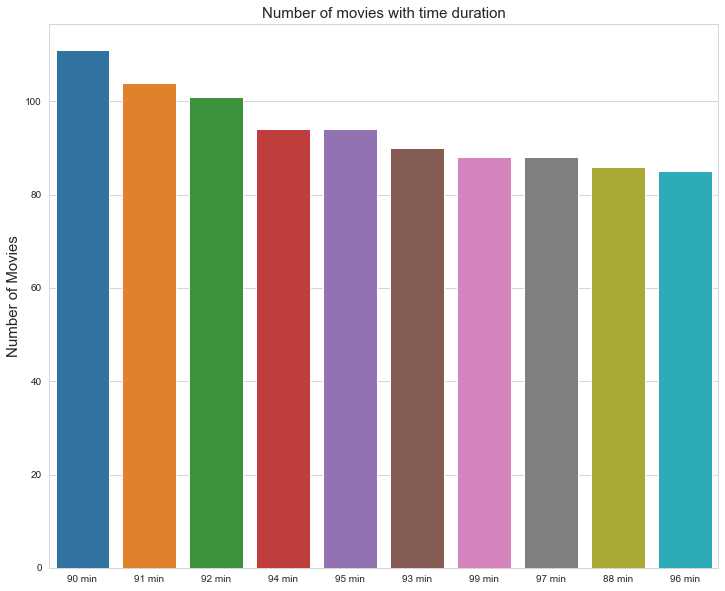

In [19]:
plt.figure(figsize = (12,10))
sns.barplot(df_movies["duration"].value_counts().nlargest(10).index,df_movies["duration"].value_counts().nlargest(10))
plt.ylabel("Number of Movies", fontsize = 15)
plt.title("Number of movies with time duration",fontsize = 15)
plt.show()

Movies are generally near 90 minutes of duration

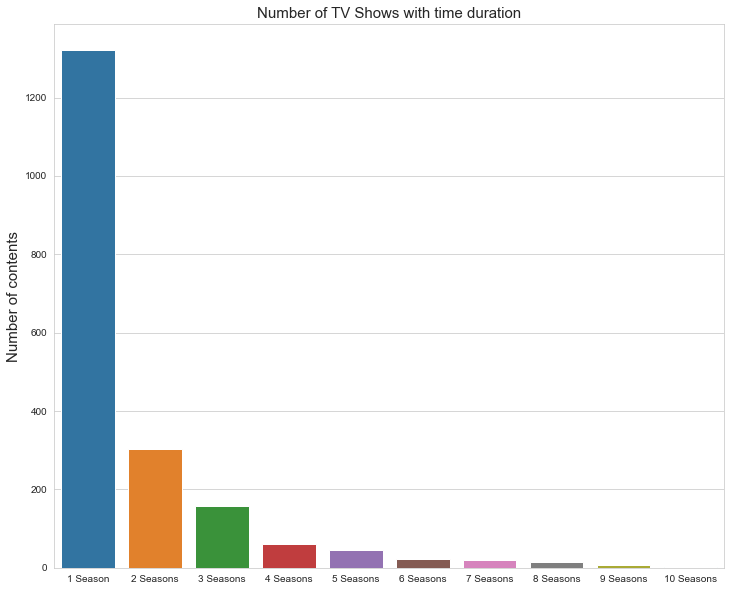

In [20]:
plt.figure(figsize = (12,10))
sns.barplot(df_shows["duration"].value_counts().nlargest(10).index,df_shows["duration"].value_counts().nlargest(10))
plt.ylabel("Number of contents", fontsize = 15)
plt.title("Number of TV Shows with time duration",fontsize = 15)
plt.show()

Generally TV Shows have only one Season